In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from util import resultsmngr, analyzer

## Look at best performance for each model type

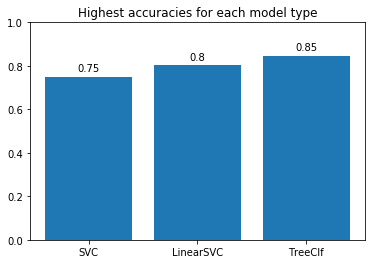

In [2]:
results = resultsmngr.load('CensusIncome/results/1577576647.json')

def graphBestByModelType(results):
  best = analyzer.bestparams(results)
  fig, ax = plt.subplots()
  ax.set_ylim((0, 1))
  rex = ax.bar(range(len(best)), [best[b]['metrics']['testing-accuracy'] for b in best])
  ax.set_xticks(range(len(best)))
  ax.set_xticklabels(list(best))
  for r in rex:
    ht = r.get_height()
    ax.annotate(
      str(round(ht, 2)),
      xy=(r.get_x() + r.get_width() / 2, ht),
      xytext=(0, 3),  # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
  ax.set_title("Highest accuracies for each model type")
  return best
  
  
best = graphBestByModelType(results)

In [10]:
print(json.dumps(best, indent=4))

{
    "SVC": {
        "params": null,
        "metrics": {
            "training-accuracy": 0.7530613147075726,
            "testing-accuracy": 0.7451266410290412
        }
    },
    "LinearSVC": {
        "params": null,
        "metrics": {
            "training-accuracy": 0.3441934485654922,
            "testing-accuracy": 0.3531361888343721
        }
    },
    "TreeClf": {
        "params": {
            "max_depth": 10
        },
        "metrics": {
            "training-accuracy": 0.870341717872773,
            "testing-accuracy": 0.8528046678159396
        }
    }
}


## Seems like a DecisionTreeClassifier will be best so lets GridSearch